In [1]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy import misc
from scipy import stats
import pickle
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model
from matplotlib.lines import Line2D
%matplotlib inline

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, r2_score, mean_squared_error, mean_absolute_error

In [2]:
repo = os.path.join('/home/sditom/us_hindecast_project/public')
fig_repo = os.path.join(repo,'figs')

In [3]:
# cd us_hindecast_project/public/data
# gsutil cp -r gs://us_crop_type_hindcast/landsat .

In [4]:
# This script is to check Landsat availability in growing season June - July- August

## Landsat Availability

### June-July-August

In [5]:
## June-July-August
landsat_dir = os.path.join(repo,'data','landsat')

landsat = pd.DataFrame()
for filename in os.listdir(landsat_dir):
    if (filename.endswith('JJA_13states.csv')):
        print(filename)
        temp = pd.read_csv(os.path.join(landsat_dir, filename)).drop(['.geo','DRAWSEQ','system:index'],axis=1)
        landsat = pd.concat([temp, landsat], sort=True)
# landsat["year_date"] = pd.to_datetime(landsat["year"].astype(str), format="%Y")  
landsat.head()

2013_landsatAvailability_JJA_13states.csv
1999_landsatAvailability_JJA_13states.csv
2001_landsatAvailability_JJA_13states.csv
2009_landsatAvailability_JJA_13states.csv
2005_landsatAvailability_JJA_13states.csv
2017_landsatAvailability_JJA_13states.csv
2018_landsatAvailability_JJA_13states.csv
2000_landsatAvailability_JJA_13states.csv
2015_landsatAvailability_JJA_13states.csv
2014_landsatAvailability_JJA_13states.csv
2010_landsatAvailability_JJA_13states.csv
2004_landsatAvailability_JJA_13states.csv
2003_landsatAvailability_JJA_13states.csv
2012_landsatAvailability_JJA_13states.csv
2002_landsatAvailability_JJA_13states.csv
2011_landsatAvailability_JJA_13states.csv
2008_landsatAvailability_JJA_13states.csv
2016_landsatAvailability_JJA_13states.csv
2007_landsatAvailability_JJA_13states.csv
2006_landsatAvailability_JJA_13states.csv


,STATE_ABBR,STATE_FIPS,STATE_NAME,SUB_REGION,area,max,mean,median,min,stdDev,year
0,MI,26,Michigan,East North Central,72555800.0,19,6.352301,6.091839,0,2.828283,2006
1,WI,55,Wisconsin,East North Central,70941500.0,19,8.092974,8.061437,0,3.014469,2006
2,MN,27,Minnesota,West North Central,113537000.0,18,7.512209,8.033610,0,2.985865,2006
3,ND,38,North Dakota,West North Central,99086800.0,21,9.663755,10.049682,0,3.577995,2006
4,SD,46,South Dakota,West North Central,96940000.0,22,9.381010,9.024682,0,3.565980,2006


In [6]:
state_geosorted = ['North Dakota','Minnesota', 'Wisconsin' ,'Michigan',
 'South Dakota','Iowa', 'Illinois', 'Indiana',
 'Nebraska', 'Missouri', 'Kentucky','Ohio',
 'Kansas']

/home/sditom/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


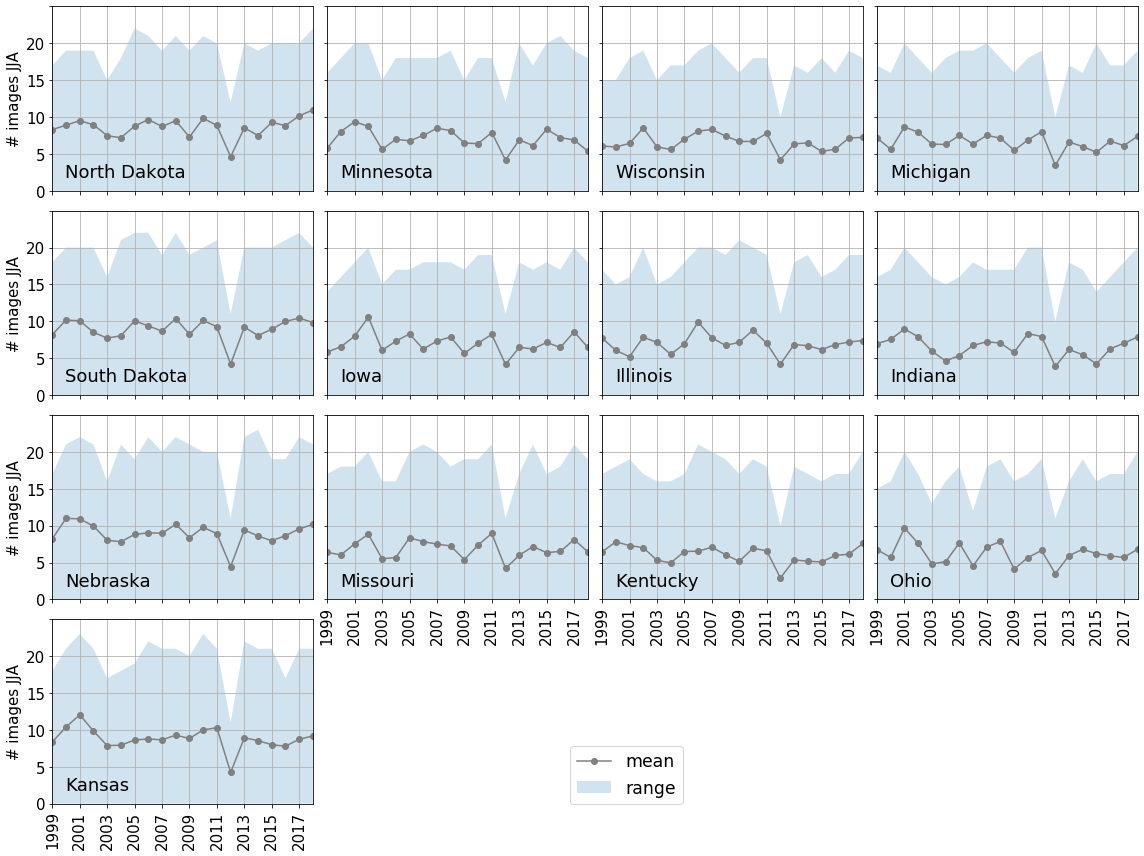

In [7]:
fig, ax = plt.subplots(nrows=4, ncols=4,figsize=(16,12))
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.0)
fsize = 15

for i, id in enumerate(state_geosorted):

    group = landsat[landsat['STATE_NAME']==id]
    
    thisAx = ax[int(np.floor(i/4)), i%4]
    group = group.sort_values('year')
    group.plot('year','mean', ax=thisAx, marker='o',color='gray')
#     group.plot('year','min', ax=thisAx ,color='gray')
#     group.plot('year','max', ax=thisAx,color='gray')
    thisAx.fill_between(group['year'].values, group['min'].values, group['max'].values, alpha = 0.2)
    
    thisAx.set_ylim([0,25])
#     thisAx.set_title(id)
    thisAx.text(0.05, 0.1, id, ha="left", va="center", size=18, bbox=bbox_props, transform=thisAx.transAxes)
    
    
    thisAx.set_yticklabels('', rotation=0)
    
    xlabels = np.arange(1999, 2019,2)     
    thisAx.set_xticks(xlabels)
    thisAx.set_xticklabels('', rotation=90)
    thisAx.set_xlabel('')
    
    thisAx.grid(True)
    thisAx.legend().set_visible(False)

ylabels = np.arange(0,25,5)    
ax[0,0].set_ylabel('# images JJA',fontsize=fsize)
ax[1,0].set_ylabel('# images JJA',fontsize=fsize)
ax[2,0].set_ylabel('# images JJA',fontsize=fsize)
ax[3,0].set_ylabel('# images JJA',fontsize=fsize)    
ax[0,0].set_yticklabels(ylabels, rotation=0,fontsize=fsize)
ax[1,0].set_yticklabels(ylabels, rotation=0,fontsize=fsize)
ax[2,0].set_yticklabels(ylabels, rotation=0,fontsize=fsize)
ax[3,0].set_yticklabels(ylabels, rotation=0,fontsize=fsize)


ax[3,0].set_xticklabels(xlabels, rotation=90,fontsize=fsize)

ax[-1,-1].axis('off')
ax[-1,-2].axis('off')
ax[-1,-3].axis('off')    

fig.tight_layout()
ax[2,1].set_xticklabels(xlabels, rotation=90,fontsize=fsize)
ax[2,2].set_xticklabels(xlabels, rotation=90,fontsize=fsize)
ax[2,3].set_xticklabels(xlabels, rotation=90,fontsize=fsize)


# Create the legend
colors = ['gray','gray']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in colors]
mylabels = ['mean', 'range']

fig.legend(lines,     # The line objects
           labels=mylabels,   # The labels for each line
           loc="lower right",   # Position of legend
           bbox_to_anchor=(0.6, 0.05),
           fontsize = 'xx-large'
           )


fig.savefig(os.path.join(fig_repo,'landsat_availability_ts_JJA.png'))